##Testing and other operations on the dataset

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


2025-08-03 21:35:28.893675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754271328.917896   88376 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754271328.924928   88376 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-03 21:35:29.001211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = '/home/suraj/Git/SCR-Progression/Nemours_Jing_RL_Annotated.h5'

In [3]:
f = h5py.File(path, 'r')
f.keys()

<KeysViewHDF5 ['images', 'layers', 'names']>

In [4]:
images = f['images']
layers = f['layers']
names = f['names']

images, layers, names

(<HDF5 dataset "images": shape (310, 496, 768), type "|u1">,
 <HDF5 group "/layers" (9 members)>,
 <HDF5 dataset "names": shape (310,), type "|O">)

In [6]:
layers.keys()

<KeysViewHDF5 ['BM', 'ELM', 'GCL', 'ILM', 'INL', 'IPL', 'OPL', 'PR1', 'RPE']>

In [7]:
layers['ILM'].shape

(310, 768)

In [8]:
images.shape

(310, 496, 768)

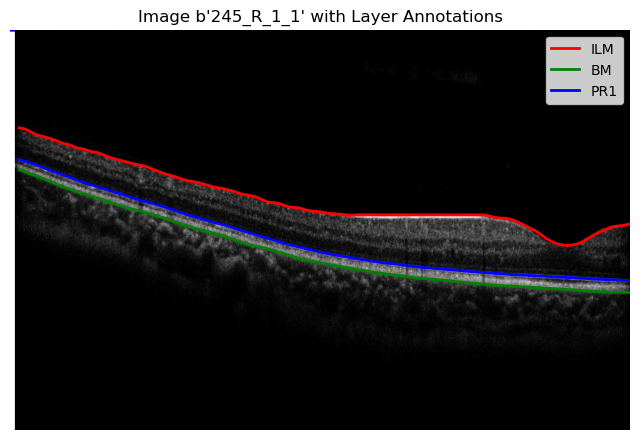

In [ ]:
# Plot image 0 with ILM, BM, and PR1 layer annotations

img0 = images[45]

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img0, cmap='gray')
ax.set_title(f'Image  {names[45]} with Layer Annotations')
ax.axis('off')

for layer_name, color in zip(['ILM', 'BM', 'PR1'], ['r', 'g', 'b']):
    coords = layers[layer_name][45]  # shape: (width,) or (width, 2)
    if coords.ndim == 1:
        # If only y-coordinates, x is just np.arange
        x = np.arange(coords.shape[0])
        y = coords
    else:
        # If (x, y) pairs
        x, y = coords[:, 0], coords[:, 1]
    ax.plot(x, y, color=color, label=layer_name, linewidth=2)

ax.legend()
plt.show()

In [ ]:
def plot_image_with_layers(images, layers, names, idx=0, layer_list=['ILM', 'BM', 'PR1'], colors=['r', 'g', 'b'], figsize=(8, 6), save_path=None):
    """
    Plot an image with specified layer annotations.

    Args:
        images: h5py dataset of images
        layers: h5py group of layer annotations
        names: h5py dataset of image names
        idx: index of the image to plot
        layer_list: list of layer names to plot
        colors: list of colors for each layer
        figsize: tuple for figure size
    """
    img = images[idx]
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Image - {names[idx]} with Layer Annotations')
    ax.axis('on')

    for layer_name, color in zip(layer_list, colors):
        coords = layers[layer_name][idx]
        if coords.ndim == 1:
            x = np.arange(coords.shape[0])
            y = coords
        else:
            x, y = coords[:, 0], coords[:, 1]
        ax.plot(x, y, color=color, label=layer_name, linewidth=2)
    ax.set_xlabel('X (pixels)')
    ax.set_ylabel('Y (pixels)')
    ax.legend()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

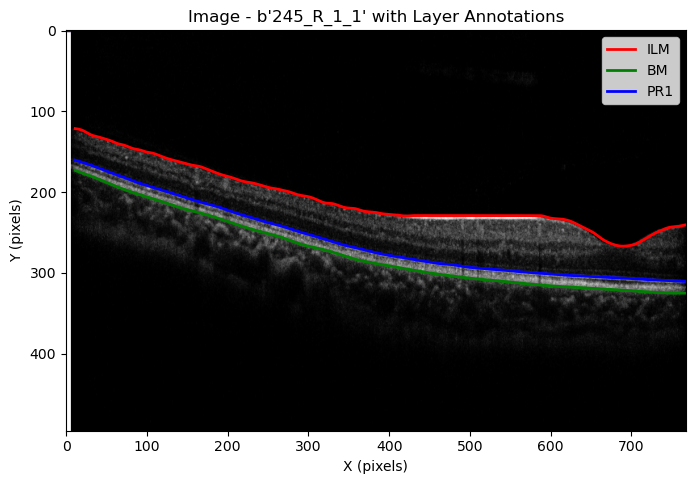

In [8]:
plot_image_with_layers(images, layers, names, idx=45)

In [15]:
#print name on index 45
print(f"Image name at index 45: {names[45]}")

Image name at index 45: b'245_R_1_1'


In [ ]:
plot_image_with_layers(images, layers, names, idx=45, save_path="Nemours_Annotation_Image.png")